1. Kmeans聚类算法简介

由于具有出色的速度和良好的可扩展性，Kmeans聚类算法算得上是最著名的聚类方法。Kmeans算法是一个重复移动类中心点的过程，把类的中心点，也称重心(centroids)，移动到其包含成员的平均位置，然后重新划分其内部成员。k是算法计算出的超参数，表示类的数量；Kmeans可以自动分配样本到不同的类，但是不能决定究竟要分几个类。k必须是一个比训练集样本数小的正整数。有时，类的数量是由问题内容指定的。例如，一个鞋厂有三种新款式，它想知道每种新款式都有哪些潜在客户，于是它调研客户，然后从数据里找出三类。也有一些问题没有指定聚类的数量，最优的聚类数量是不确定的。后面我将会详细介绍一些方法来估计最优聚类数量。

Kmeans的参数是类的重心位置和其内部观测值的位置。与广义线性模型和决策树类似，Kmeans参数的最优解也是以成本函数最小化为目标。Kmeans成本函数公式如下：

J=∑i=1k∑j∈ck(x(j)−μi)2

μi是第k个类的重心位置。成本函数是各个类畸变程度(distortions)之和。每个类的畸变程度等于该类重心与其内部成员位置距离的平方和。若类内部的成员彼此间越紧凑则类的畸变程度越小，反之，若类内部的成员彼此间越分散则类的畸变程度越大。求解成本函数最小化的参数就是一个重复配置每个类包含的观测值，并不断移动类重心的过程。首先，类的重心是随机确定的位置。实际上，重心位置等于随机选择的观测值的位置。每次迭代的时候，Kmeans会把观测值分配到离它们最近的类，然后把重心移动到该类全部成员位置的平均值那里。
2. K值的确定
2.1 根据问题内容确定

这种方法就不多讲了，文章开篇就举了一个例子。
2.2 肘部法则

如果问题中没有指定k
的值，可以通过肘部法则这一技术来估计聚类数量。肘部法则会把不同k值的成本函数值画出来。随着k值的增大，平均畸变程度会减小；每个类包含的样本数会减少，于是样本离其重心会更近。但是，随着k值继续增大，平均畸变程度的改善效果会不断减低。k值增大过程中，畸变程度的改善效果下降幅度最大的位置对应的k值就是肘部。为了让读者看的更加明白，下面让我们通过一张图用肘部法则来确定最佳的k

值。下图数据明显可分成两类：

这里写图片描述

从图中可以看出，k值从1到2时，平均畸变程度变化最大。超过2以后，平均畸变程度变化显著降低。因此最佳的k是2。
2.3 与层次聚类结合

经常会产生较好的聚类结果的一个有趣策略是，首先采用层次凝聚算法决定结果粗的数目，并找到一个初始聚类，然后用迭代重定位来改进该聚类。
2.4 稳定性方法

稳定性方法对一个数据集进行2次重采样产生2个数据子集，再用相同的聚类算法对2个数据子集进行聚类，产生2个具有k
个聚类的聚类结果，计算2个聚类结果的相似度的分布情况。2个聚类结果具有高的相似度说明k个聚类反映了稳定的聚类结构，其相似度可以用来估计聚类个数。采用次方法试探多个k

，找到合适的k值。
2.5 系统演化方法

系统演化方法将一个数据集视为伪热力学系统，当数据集被划分为k
个聚类时称系统处于状态k。系统由初始状态k=1出发，经过分裂过程和合并过程，系统将演化到它的稳定平衡状态 ki ，其所对应的聚类结构决定了最优类数 ki

。系统演化方法能提供关于所有聚类之间的相对边界距离或可分程度，它适用于明显分离的聚类结构和轻微重叠的聚类结构。
2.6 使用canopy算法进行初始划分

基于Canopy Method的聚类算法将聚类过程分为两个阶段

(1) 聚类最耗费计算的地方是计算对象相似性的时候，Canopy Method在第一阶段选择简单、计算代价较低的方法计算对象相似性，将相似的对象放在一个子集中，这个子集被叫做Canopy，通过一系列计算得到若干Canopy，Canopy之间可以是重叠的，但不会存在某个对象不属于任何Canopy的情况，可以把这一阶段看做数据预处理；

(2) 在各个Canopy内使用传统的聚类方法(如Kmeans)，不属于同一Canopy的对象之间不进行相似性计算。

从这个方法起码可以看出两点好处：首先，Canopy不要太大且Canopy之间重叠的不要太多的话会大大减少后续需要计算相似性的对象的个数；其次，类似于Kmeans这样的聚类方法是需要人为指出K的值的，通过(1)得到的Canopy个数完全可以作为这个k值，一定程度上减少了选择k的盲目性。

其他方法如贝叶斯信息准则方法(BIC)可参看文献[4]。
3. 初始质心的选取

选择适当的初始质心是基本kmeans算法的关键步骤。常见的方法是随机的选取初始中心，但是这样簇的质量常常很差。处理选取初始质心问题的一种常用技术是：多次运行，每次使用一组不同的随机初始质心，然后选取具有最小SSE(误差的平方和)的簇集。这种策略简单，但是效果可能不好，这取决于数据集和寻找的簇的个数。

第二种有效的方法是，取一个样本，并使用层次聚类技术对它聚类。从层次聚类中提取k
个簇，并用这些簇的质心作为初始质心。该方法通常很有效，但仅对下列情况有效：(1)样本相对较小，例如数百到数千(层次聚类开销较大)；(2) k

相对于样本大小较小。

第三种选择初始质心的方法，随机地选择第一个点，或取所有点的质心作为第一个点。然后，对于每个后继初始质心，选择离已经选取过的初始质心最远的点。使用这种方法，确保了选择的初始质心不仅是随机的，而且是散开的。但是，这种方法可能选中离群点。此外，求离当前初始质心集最远的点开销也非常大。为了克服这个问题，通常该方法用于点样本。由于离群点很少(多了就不是离群点了)，它们多半不会在随机样本中出现。计算量也大幅减少。

第四种方法就是上面提到的canopy算法。
4. 距离的度量

常用的距离度量方法包括：欧几里得距离和余弦相似度。两者都是评定个体间差异的大小的。

欧氏距离是最常见的距离度量，而余弦相似度则是最常见的相似度度量，很多的距离度量和相似度度量都是基于这两者的变形和衍生，所以下面重点比较下两者在衡量个体差异时实现方式和应用环境上的区别。

借助三维坐标系来看下欧氏距离和余弦相似度的区别：

这里写图片描述

从图上可以看出距离度量衡量的是空间各点间的绝对距离，跟各个点所在的位置坐标(即个体特征维度的数值)直接相关；而余弦相似度衡量的是空间向量的夹角，更加的是体现在方向上的差异，而不是位置。如果保持A点的位置不变，B点朝原方向远离坐标轴原点，那么这个时候余弦相似cosθ是保持不变的，因为夹角不变，而A、B两点的距离显然在发生改变，这就是欧氏距离和余弦相似度的不同之处。

根据欧氏距离和余弦相似度各自的计算方式和衡量特征，分别适用于不同的数据分析模型：欧氏距离能够体现个体数值特征的绝对差异，所以更多的用于需要从维度的数值大小中体现差异的分析，如使用用户行为指标分析用户价值的相似度或差异；而余弦相似度更多的是从方向上区分差异，而对绝对的数值不敏感，更多的用于使用用户对内容评分来区分用户兴趣的相似度和差异，同时修正了用户间可能存在的度量标准不统一的问题(因为余弦相似度对绝对数值不敏感)。

因为欧几里得距离度量会受指标不同单位刻度的影响，所以一般需要先进行标准化，同时距离越大，个体间差异越大；空间向量余弦夹角的相似度度量不会受指标刻度的影响，余弦值落于区间[-1,1]，值越大，差异越小。但是针对具体应用，什么情况下使用欧氏距离，什么情况下使用余弦相似度？

从几何意义上来说，n维向量空间的一条线段作为底边和原点组成的三角形，其顶角大小是不确定的。也就是说对于两条空间向量，即使两点距离一定，他们的夹角余弦值也可以随意变化。感性的认识，当两用户评分趋势一致时，但是评分值差距很大，余弦相似度倾向给出更优解。举个极端的例子，两用户只对两件商品评分，向量分别为(3,3)和(5,5)，这两位用户的认知其实是一样的，但是欧式距离给出的解显然没有余弦值合理。
5. 聚类效果评估

我们把机器学习定义为对系统的设计和学习，通过对经验数据的学习，将任务效果的不断改善作为一个度量标准。Kmeans是一种非监督学习，没有标签和其他信息来比较聚类结果。但是，我们还是有一些指标可以评估算法的性能。我们已经介绍过类的畸变程度的度量方法。本节为将介绍另一种聚类算法效果评估方法称为轮廓系数(Silhouette Coefficient)。轮廓系数是类的密集与分散程度的评价指标。它会随着类的规模增大而增大。彼此相距很远，本身很密集的类，其轮廓系数较大，彼此集中，本身很大的类，其轮廓系数较小。轮廓系数是通过所有样本计算出来的，计算每个样本分数的均值，计算公式如下：

s=a−bmax(a,b)

a
是每一个类中样本彼此距离的均值，b

是一个类中样本与其最近的那个类的所有样本的距离的均值。
6. Kmeans算法流程

输入：聚类个数k，数据集Xmxn

。
输出：满足方差最小标准的k个聚类。

(1) 选择k个初始中心点，例如c[0]=X[0] , … , c[k-1]=X[k-1]；

(2) 对于X[0]….X[n]，分别与c[0]…c[k-1]比较，假定与c[i]差值最少，就标记为i；

(3) 对于所有标记为i点，重新计算c[i]={ 所有标记为i的样本的每个特征的均值}；

(4) 重复(2)(3)，直到所有c[i]值的变化小于给定阈值或者达到最大迭代次数。

Kmeans的时间复杂度：O(tkmn)，空间复杂度：O((m+k)n)。其中，t为迭代次数，k为簇的数目，m为样本数，n为特征数。
7. Kmeans算法优缺点
7.1 优点

(1). 算法原理简单。需要调节的超参数就是一个k。

(2). 由具有出色的速度和良好的可扩展性。
7.2 缺点

(1). 在 Kmeans 算法中 k
需要事先确定，这个 k

值的选定有时候是比较难确定。

(2). 在 Kmeans 算法中，首先需要初始k个聚类中心，然后以此来确定一个初始划分，然后对初始划分进行优化。这个初始聚类中心的选择对聚类结果有较大的影响，一旦初始值选择的不好，可能无法得到有效的聚类结果。多设置一些不同的初值，对比最后的运算结果，一直到结果趋于稳定结束。

(3). 该算法需要不断地进行样本分类调整，不断地计算调整后的新的聚类中心，因此当数据量非常大时，算法的时间开销是非常大的。

(4). 对离群点很敏感。

(5). 从数据表示角度来说，在 Kmeans 中,我们用单个点来对 cluster 进行建模，这实际上是一种最简化的数据建模形式。这种用点来对 cluster 进行建模实际上就已经假设了各 cluster的数据是呈圆形(或者高维球形)或者方形等分布的。不能发现非凸形状的簇。但在实际生活中，很少能有这种情况。所以在 GMM 中，使用了一种更加一般的数据表示，也就是高斯分布。

(6). 从数据先验的角度来说，在 Kmeans 中,我们假设各个 cluster 的先验概率是一样的,但是各个 cluster 的数据量可能是不均匀的。举个例子,cluster A 中包含了10000个样本,cluster B 中只包含了100个。那么对于一个新的样本,在不考虑其与A cluster、 B cluster 相似度的情况,其属于 cluster A 的概率肯定是要大于 cluster B的。

(7). 在 Kmeans 中，通常采用欧氏距离来衡量样本与各个 cluster 的相似度。这种距离实际上假设了数据的各个维度对于相似度的衡量作用是一样的。但在 GMM 中，相似度的衡量使用的是后验概率 αcG(x|μc,∑c)

，通过引入协方差矩阵,我们就可以对各维度数据的不同重要性进行建模。

(8). 在 Kmeans 中，各个样本点只属于与其相似度最高的那个 cluster ，这实际上是一种 hard clustering 。

针对Kmeans算法的缺点，很多前辈提出了一些改进的算法。例如 K-modes 算法，实现对离散数据的快速聚类，保留了Kmeans算法的效率同时将Kmeans的应用范围扩大到离散数据。还有K-Prototype算法，可以对离散与数值属性两种混合的数据进行聚类，在K-prototype中定义了一个对数值与离散属性都计算的相异性度量标准。当然还有其它的一些算法，这里我 就不一一列举了。

Kmeans 与 GMM 更像是一种 top-down 的思想，它们首先要解决的问题是，确定 cluster 数量，也就是 k 的取值。在确定了 k 后,再来进行数据的聚类。而 hierarchical clustering 则是一种 bottom-up 的形式，先有数据，然后通过不断选取最相似的数据进行聚类。
--------------------- 
作者：风雪夜归子 
来源：CSDN 
原文：https://blog.csdn.net/u013719780/article/details/78413770 
版权声明：本文为博主原创文章，转载请附上博文链接！

/opt/conda/lib/python3.6/site-packages/matplotlib/collections.py:836: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


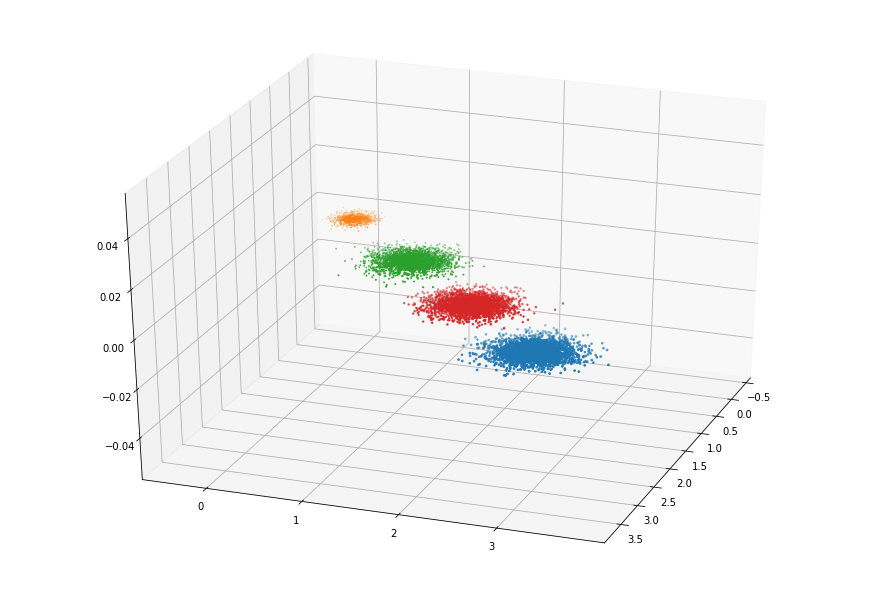

In [1]:
import random
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


# 正规化数据集 X
def normalize(X, axis=-1, p=2):
    lp_norm = np.atleast_1d(np.linalg.norm(X, p, axis))
    lp_norm[lp_norm == 0] = 1
    return X / np.expand_dims(lp_norm, axis)


# 计算一个样本与数据集中所有样本的欧氏距离的平方
def euclidean_distance(one_sample, X):
    one_sample = one_sample.reshape(1, -1)
    X = X.reshape(X.shape[0], -1)
    distances = np.power(np.tile(one_sample, (X.shape[0], 1)) - X, 2).sum(axis=1)
    return distances



class Kmeans():
    """Kmeans聚类算法.

    Parameters:
    -----------
    k: int
        聚类的数目.
    max_iterations: int
        最大迭代次数. 
    varepsilon: float
        判断是否收敛, 如果上一次的所有k个聚类中心与本次的所有k个聚类中心的差都小于varepsilon, 
        则说明算法已经收敛
    """
    def __init__(self, k=2, max_iterations=500, varepsilon=0.0001):
        self.k = k
        self.max_iterations = max_iterations
        self.varepsilon = varepsilon

    # 从所有样本中随机选取self.k样本作为初始的聚类中心
    def init_random_centroids(self, X):
        n_samples, n_features = np.shape(X)
        centroids = np.zeros((self.k, n_features))
        for i in range(self.k):
            centroid = X[np.random.choice(range(n_samples))]
            centroids[i] = centroid
        return centroids

    # 返回距离该样本最近的一个中心索引[0, self.k)
    def _closest_centroid(self, sample, centroids):
        distances = euclidean_distance(sample, centroids)
        closest_i = np.argmin(distances)
        return closest_i

    # 将所有样本进行归类，归类规则就是将该样本归类到与其最近的中心
    def create_clusters(self, centroids, X):
        n_samples = np.shape(X)[0]
        clusters = [[] for _ in range(self.k)]
        for sample_i, sample in enumerate(X):
            centroid_i = self._closest_centroid(sample, centroids)
            clusters[centroid_i].append(sample_i)
        return clusters

    # 对中心进行更新
    def update_centroids(self, clusters, X):
        n_features = np.shape(X)[1]
        centroids = np.zeros((self.k, n_features))
        for i, cluster in enumerate(clusters):
            centroid = np.mean(X[cluster], axis=0)
            centroids[i] = centroid
        return centroids

    # 将所有样本进行归类，其所在的类别的索引就是其类别标签
    def get_cluster_labels(self, clusters, X):
        y_pred = np.zeros(np.shape(X)[0])
        for cluster_i, cluster in enumerate(clusters):
            for sample_i in cluster:
                y_pred[sample_i] = cluster_i
        return y_pred

    # 对整个数据集X进行Kmeans聚类，返回其聚类的标签
    def predict(self, X):
        # 从所有样本中随机选取self.k样本作为初始的聚类中心
        centroids = self.init_random_centroids(X)

        # 迭代，直到算法收敛(上一次的聚类中心和这一次的聚类中心几乎重合)或者达到最大迭代次数
        for _ in range(self.max_iterations):
            # 将所有进行归类，归类规则就是将该样本归类到与其最近的中心
            clusters = self.create_clusters(centroids, X)
            former_centroids = centroids

            # 计算新的聚类中心
            centroids = self.update_centroids(clusters, X)

            # 如果聚类中心几乎没有变化，说明算法已经收敛，退出迭代
            diff = centroids - former_centroids
            if diff.any() < self.varepsilon:
                break

        return self.get_cluster_labels(clusters, X)


def main():
    # Load the dataset
    X, y = datasets.make_blobs(n_samples=10000, 
                               n_features=3, 
                               centers=[[3,3, 3], [0,0,0], [1,1,1], [2,2,2]], 
                               cluster_std=[0.2, 0.1, 0.2, 0.2], 
                               random_state =9)

    # 用Kmeans算法进行聚类
    clf = Kmeans(k=4)
    y_pred = clf.predict(X)


    # 可视化聚类效果
    fig = plt.figure(figsize=(12, 8))
    ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], X[y==0][:, 2])
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], X[y==1][:, 2])
    plt.scatter(X[y==2][:, 0], X[y==2][:, 1], X[y==2][:, 2])
    plt.scatter(X[y==3][:, 0], X[y==3][:, 1], X[y==3][:, 2])
    plt.show()


if __name__ == "__main__":
    main()
